In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('./wine.data', delimiter=',')

In [3]:
X, Y = data[:, 1:], data[:,0]
ids=[]
for i in range(len(Y)):
    if(Y[i]!=3):
        ids.append(i)
x=X[ids]
y=Y[ids]
mn=x.mean(axis=0)
ma=x.max(axis=0)
mi=x.min(axis=0)
x = (x - mn)/(ma-mi)
x = np.hstack((x,np.ones(len(x)).reshape(len(x),1)))
y = np.array(list(map(lambda x: 0 if x == 1 else 1, y))) 

In [4]:
logisticRegr = LogisticRegression(solver='liblinear', C=1005000)
logisticRegr.fit(x,y)
loss = log_loss(y,logisticRegr.predict_proba(x))
print("{:<8f}".format(loss))

0.000038


In [5]:
def sigmoid(m):
    return 1 / (1 + np.exp(-m))
def dot_product(a,b):
    return(np.dot(a,b))

In [6]:
def logloss(y, y_pred):
    loss = -(1/len(y))*np.sum(y*np.log(y_pred) + (1 - y)*np.log(1 - y_pred))
    return loss

In [7]:
def gradient(x,y,y_pred):
    gt=list(np.dot((y_pred - y),x)[0])
    return gt

In [8]:
wt = np.zeros(14).reshape(14,1)
n = 0.01
l = []
for epoch1 in range(1005000):
    y_pred = sigmoid(dot_product(wt.T,x.T))
    grad = gradient(x, y, y_pred)
    large = np.argmax(np.abs(grad))
    l.append(logloss(y, y_pred))  
    wt[large] = wt[large] - n*grad[large]
print("Loss L = {0}".format(l[-1]))

Loss L = 0.00046983905239203656


In [9]:
wtr = np.zeros(14).reshape(14,1)
n = 0.01
lran = []
for epoch2 in range(1005000):
    y_predr = sigmoid(dot_product(wtr.T,x.T))
    gradr = gradient(x, y, y_predr)
    rint=random.randint(0,13)
    lran.append(logloss(y, y_predr))  
    wtr[rint] = wtr[rint] - n*gradr[rint]
print("Loss L = {0}".format(lran[-1]))

Loss L = 0.0009352838592129538


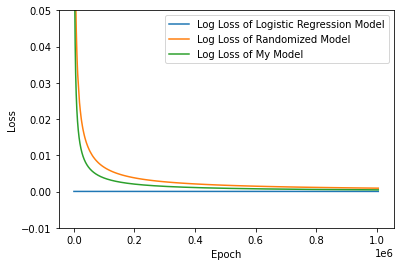

In [10]:
x=[i for i in range(0,1005000)]
log_lo=[loss for i in range(0,1005000)]
plt.plot(x,log_lo, label = 'Log Loss of Logistic Regression Model')
plt.plot(x, lran, label = 'Log Loss of Randomized Model')
plt.plot(x, l, label = 'Log Loss of My Model')
plt.ylim((-0.01,0.05))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss.png')
plt.show()